#BIG_MART_SALES

This dataframe typically includes various attributes related to items sold in a retail store, along with details about the stores themselves.

1. **Item_Identifier**: A unique identifier for each item in the store. This could be a SKU (Stock Keeping Unit) code or another form of unique ID.

2. **Item_Weight**: The weight of the item. This is important for both inventory management and sales analysis.

3. **Item_Fat_Content**: The category of fat content for the item. Common values might include 'Low Fat', 'Regular', and sometimes other variations or misspellings.

4. **Item_Visibility**: The percentage of total display area allocated to this particular item in the store. This is a measure of how prominently an item is displayed to customers.

5. **Item_Type**: A broad category for the type of item. Examples might include 'Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables', etc.

6. **Item_MRP**: The Maximum Retail Price (MRP) of the item. This is the highest price that can be charged for the item.

7. **Outlet_Identifier**: A unique identifier for each store (outlet). This helps in distinguishing sales and inventory data across different locations.

8. **Outlet_Establishment_Year**: The year in which the outlet was established. This can be useful for understanding the store's age and possibly its market maturity.

9. **Outlet_Size**: The size of the outlet. Common categories might include 'Small', 'Medium', and 'High'.

10. **Outlet_Location_Type**: The type of city in which the outlet is located. Examples might be 'Tier 1', 'Tier 2', 'Tier 3', etc., indicating the size and economic development of the city.

11. **Outlet_Type**: The type of the outlet. This could be 'Supermarket Type1', 'Supermarket Type2', 'Grocery Store', etc.

12. **Item_Outlet_Sales**: The sales of the particular item in the particular outlet. This is the target variable that we often try to predict in sales analysis.

These columns help in analyzing sales data comprehensively by considering factors related to both the items being sold and the stores where they are sold. Understanding the interplay between these factors can provide insights into sales performance and help in strategizing for better inventory management, pricing, promotions, and store operations.

#Import libraries

In [225]:
#pip install pycaret

In [226]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import trim_mean, skew, kurtosis
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PolynomialFeatures, LabelEncoder
from sklearn.model_selection import train_test_split
#from pycaret.regression import RegressionExperiment
from sklearn.linear_model import LinearRegression, Ridge, SGDRegressor
from sklearn.metrics import r2_score
import warnings

#Read Dataset

In [227]:
!gdown 18i0RYTIBI6Tafd5LH-EiGxlfr1mcfbpU

Downloading...
From: https://drive.google.com/uc?id=18i0RYTIBI6Tafd5LH-EiGxlfr1mcfbpU
To: /content/bigmart.csv
100% 870k/870k [00:00<00:00, 107MB/s]


In [228]:
data = pd.read_csv('bigmart.csv')

In [229]:
df = data.copy()

#Interpreting with dataset

In [230]:
df.shape

(8523, 12)

In [231]:
df.size

102276

In [232]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [233]:
pd.set_option('display.precision', 2)

In [234]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.02,Dairy,249.81,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.14
1,DRC01,5.92,Regular,0.02,Soft Drinks,48.27,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.42
2,FDN15,17.50,Low Fat,0.02,Meat,141.62,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.27
3,FDX07,19.20,Regular,0.00,Fruits and Vegetables,182.09,OUT010,1998,NaN,Tier 3,Grocery Store,732.38
4,NCD19,8.93,Low Fat,0.00,Household,53.86,OUT013,1987,High,Tier 3,Supermarket Type1,994.71


In [235]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.00,8523.00,8523.00,8523.00,8523.00
mean,12.86,0.07,140.99,1997.83,2181.29
std,4.64,0.05,62.28,8.37,1706.50
min,4.55,0.00,31.29,1985.00,33.29
25%,8.77,0.03,93.83,1987.00,834.25
50%,12.60,0.05,143.01,1999.00,1794.33
75%,16.85,0.09,185.64,2004.00,3101.30
max,21.35,0.33,266.89,2009.00,13086.96


In [236]:
df.describe(include='object')

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,6113,8523,8523
unique,1559,5,16,10,3,3,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5089,1232,935,2793,3350,5577


In [237]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

#Null Handling

**total null values** = 3873\
The number of null values compare to whole dataset is too large.
so we fill the null values with **mean** since it's not skewed.

In [238]:
import numpy as np
mean = df['Item_Weight'].mean()
std = df['Item_Weight'].std()
n_missing = df['Item_Weight'].isnull().sum()

random_values = np.random.normal(loc=mean, scale=std, size=n_missing)
df.loc[df['Item_Weight'].isna(), 'Item_Weight'] = random_values
#df['Item_Weight'] = df['Item_Weight'].fillna(df['Item_Weight'].median())

In [239]:
df['Outlet_Size'] = df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0])

In [240]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

#Duplicated values Handling:


In [241]:
df.duplicated().sum()

0

Since our dataset has no duplicated values; we do nothing.

#Dive in Categorical Columns

First of all, let's drop item_identifer since it doesnt have predictive value on our target.

In [242]:
df = df.drop(columns=['Item_Identifier', 'Outlet_Identifier'], axis=1)
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.02,Dairy,249.81,1999,Medium,Tier 1,Supermarket Type1,3735.14
1,5.92,Regular,0.02,Soft Drinks,48.27,2009,Medium,Tier 3,Supermarket Type2,443.42
2,17.50,Low Fat,0.02,Meat,141.62,1999,Medium,Tier 1,Supermarket Type1,2097.27
3,19.20,Regular,0.00,Fruits and Vegetables,182.09,1998,Medium,Tier 3,Grocery Store,732.38
4,8.93,Low Fat,0.00,Household,53.86,1987,High,Tier 3,Supermarket Type1,994.71


In [243]:
cat_cols = [col for col in df.select_dtypes(include='object').columns]
cat_cols

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

Another way to creating the cat_cols:\
cat_cols = df.select_dtypes(include='object').columns.tolist()

In [244]:
for col in cat_cols:
  print('Columns Name:')
  print(df[col].value_counts())
  print('\n----------------')

Columns Name:
Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

----------------
Columns Name:
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

----------------
Columns Name:
Outlet_Size
Medium    5203
Small     2388
High       932
Name: count, dtype: int64

----------------
Columns Name:
Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: count, dtype: int64

----------------
Columns Name:
Outlet_Type
Supermarket Type1    5577
Grocer

In [245]:
def grouping_fat_content(fat_content):
  fat_content_mapping = {
      'low fat': 'Low Fat',
      'lf': 'Low Fat',
      'reg' : 'Regular',
      'regular' : 'Regular'
  }

  fat_content = str(fat_content).lower()
  return fat_content_mapping.get(fat_content, fat_content)

df['Item_Fat_Content'] = df['Item_Fat_Content'].apply(grouping_fat_content)

In [246]:
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

#Continue cleaning the data

#Mean, Trim_Mean, Skew, Kurtosis

In [247]:
num_columns = df.select_dtypes(include=['number']).columns

# Calculate mean and trimmed mean for each numeric columns
mean_vs_trimmed_mean = pd.DataFrame({'mean': df[num_columns].mean(),
                                     'trimmed_mean': df[num_columns].apply(lambda x: trim_mean(x, proportiontocut=0.1))})

# Calculate kurtosis and skewness for each numeric columns
kurtosis_skewness = pd.DataFrame({'kurtosis': df[num_columns].apply(kurtosis),
                                  'skewness': df[num_columns].apply(skew)})

print("Mean vs Trimmed Mean:")
print(mean_vs_trimmed_mean)

print("\nKurtosis and Skewness:")
print(kurtosis_skewness)

Mean vs Trimmed Mean:
                              mean  trimmed_mean
Item_Weight                  12.85         12.80
Item_Visibility               0.07          0.06
Item_MRP                    140.99        139.70
Outlet_Establishment_Year  1997.83       1998.04
Item_Outlet_Sales          2181.29       1971.33

Kurtosis and Skewness:
                           kurtosis  skewness
Item_Weight                   -1.03      0.08
Item_Visibility                1.68      1.17
Item_MRP                      -0.89      0.13
Outlet_Establishment_Year     -1.21     -0.40
Item_Outlet_Sales              1.61      1.18


#Outlier Handling

In [248]:
'''fig, axs = plt.subplots(nrows=5, ncols=1, figsize=(5,10))
index = 0
axs = axs.flatten()
for column in num_columns:
  sns.boxplot(y=column, data=df, ax = axs[index])
  index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)'''

'fig, axs = plt.subplots(nrows=5, ncols=1, figsize=(5,10))\nindex = 0\naxs = axs.flatten()\nfor column in num_columns:\n  sns.boxplot(y=column, data=df, ax = axs[index])\n  index += 1\nplt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)'

In [249]:
for c, v in df[num_columns].items():
  q1 = v.quantile(0.25)
  q3 = v.quantile(0.75)
  iqr = q3 - q1
  v_column = v[(v <= q1 - 1.5 * iqr) | (v >= q3 + 1.5 * iqr)]
  perc = np.shape(v_column)[0] * 100.0 / np.shape(df)[0]
  print('columns %s outliers = %.2f%%' % (c, perc))

columns Item_Weight outliers = 0.01%
columns Item_Visibility outliers = 1.69%
columns Item_MRP outliers = 0.00%
columns Outlet_Establishment_Year outliers = 0.00%
columns Item_Outlet_Sales outliers = 2.18%


#Visualization

##Categorical Columns

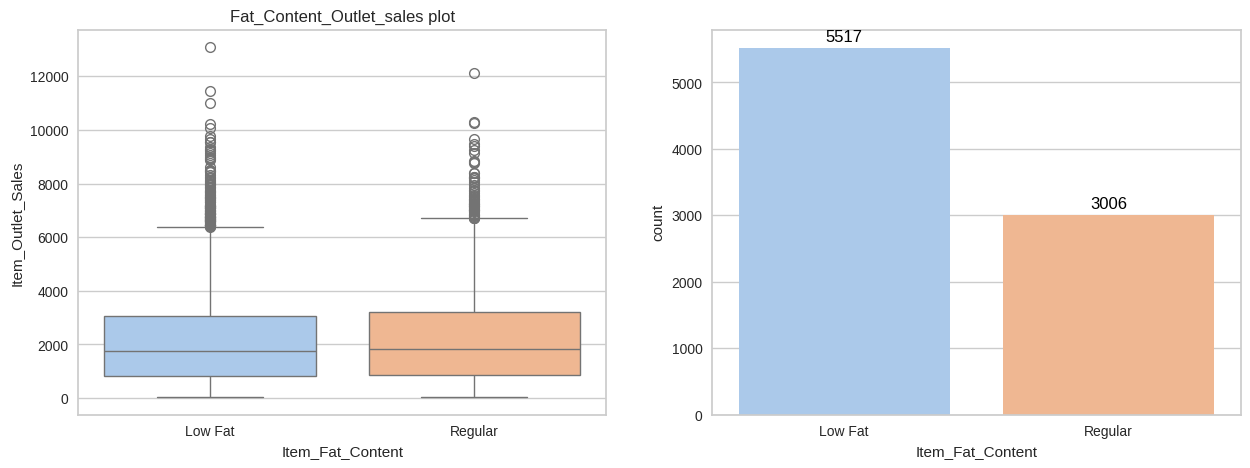

In [250]:
warnings.filterwarnings("ignore")

fig, axes = plt.subplots(1, 2, figsize=(15,5))
palette = sns.color_palette('pastel')
sns.boxplot(x='Item_Fat_Content', y='Item_Outlet_Sales', data = df, ax = axes[0], palette = palette).set_title('Fat_Content_Outlet_sales plot')
#sns.violinplot(x='Item_Fat_Content',y='Item_Outlet_Sales', data = df, ax= axes[1],palette = palette).set_title('Fat_Content_Outlet_sales plot')
ax = sns.countplot(x='Item_Fat_Content', data = df, palette=palette)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

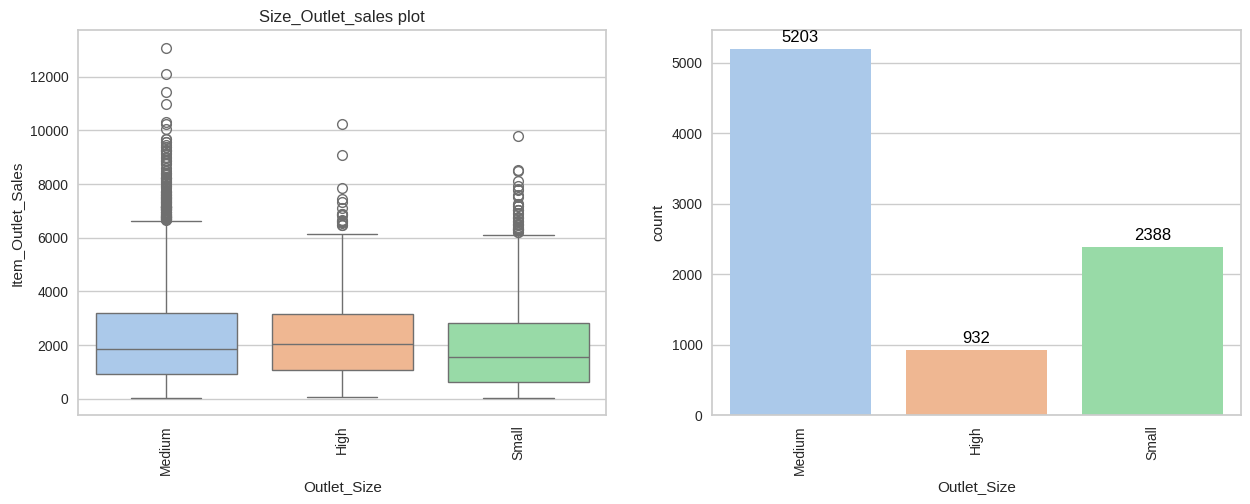

In [251]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))
palette = sns.color_palette('pastel')
sns.boxplot(x='Outlet_Size', y='Item_Outlet_Sales', data = df, ax = axes[0], palette = palette).set_title('Size_Outlet_sales plot')
#sns.violinplot(x='Outlet_Size',y='Item_Outlet_Sales', data = df, ax= axes[1],palette = palette).set_title('Size_Outlet_sales plot')
ax = sns.countplot(x='Outlet_Size', data = df, palette=palette)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.setp(axes[0].get_xticklabels(), rotation=90)
plt.setp(axes[1].get_xticklabels(), rotation=90)
plt.show()

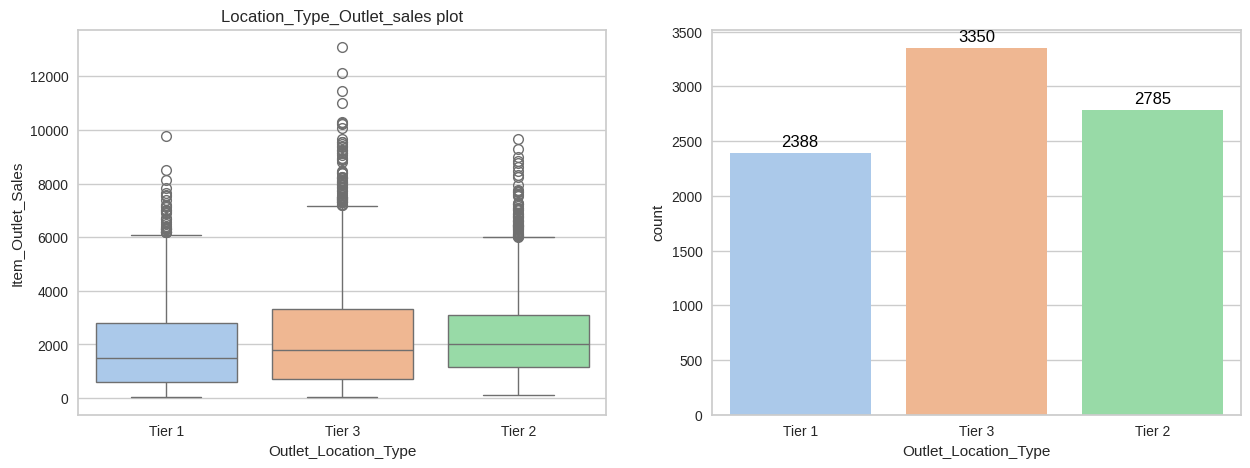

In [252]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))
palette = sns.color_palette('pastel')
sns.boxplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data = df, ax = axes[0], palette = palette).set_title('Location_Type_Outlet_sales plot')
#sns.violinplot(x='Outlet_Location_Type',y='Item_Outlet_Sales', data = df, ax= axes[1],palette = palette).set_title('Location_Type_Outlet_sales plot')
ax = sns.countplot(x='Outlet_Location_Type', data = df, palette=palette)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

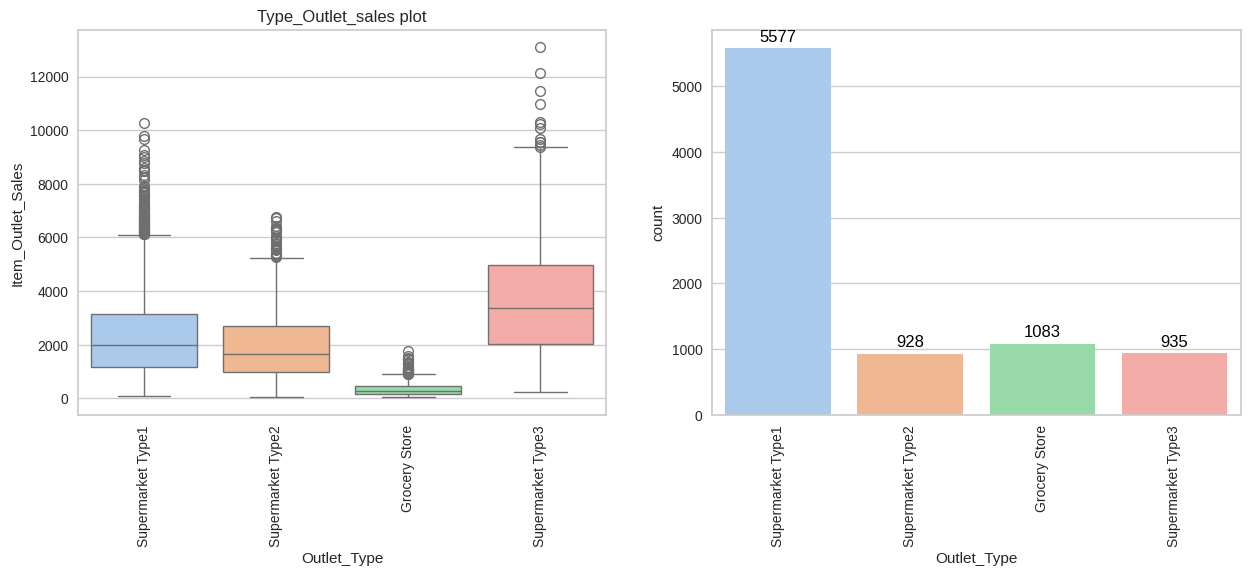

In [253]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))
palette = sns.color_palette('pastel')
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data = df, ax = axes[0], palette = palette).set_title('Type_Outlet_sales plot')
#sns.violinplot(x='Outlet_Type',y='Item_Outlet_Sales', data = df, ax= axes[1],palette = palette).set_title('Type_Outlet_sales plot')
ax = sns.countplot(x='Outlet_Type', data = df, palette=palette)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.setp(axes[0].get_xticklabels(), rotation=90)
plt.setp(axes[1].get_xticklabels(), rotation=90)
plt.show()

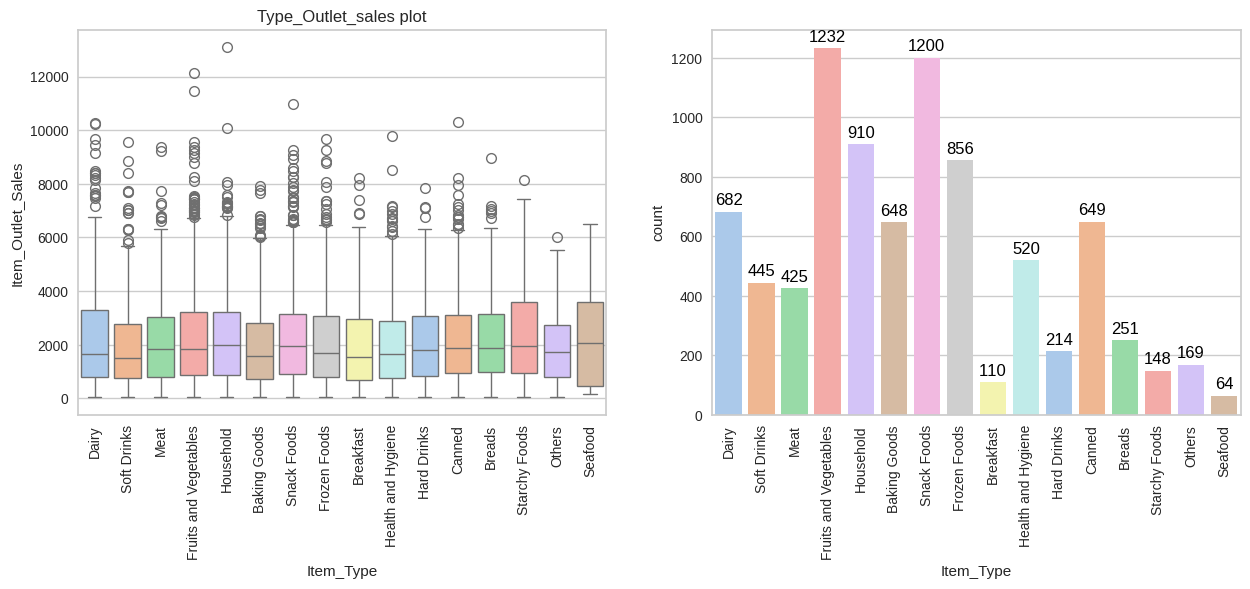

In [254]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))
palette = sns.color_palette('pastel')
sns.boxplot(x='Item_Type', y='Item_Outlet_Sales', data = df, ax = axes[0], palette = palette).set_title('Type_Outlet_sales plot')
#sns.violinplot(x='Item_Type',y='Item_Outlet_Sales', data = df, ax= axes[1],palette = palette).set_title('Type_Outlet_sales plot')
ax = sns.countplot(x='Item_Type', data = df, palette=palette)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.setp(axes[0].get_xticklabels(), rotation=90)
plt.setp(axes[1].get_xticklabels(), rotation=90)
plt.show()

##Numerical Columns

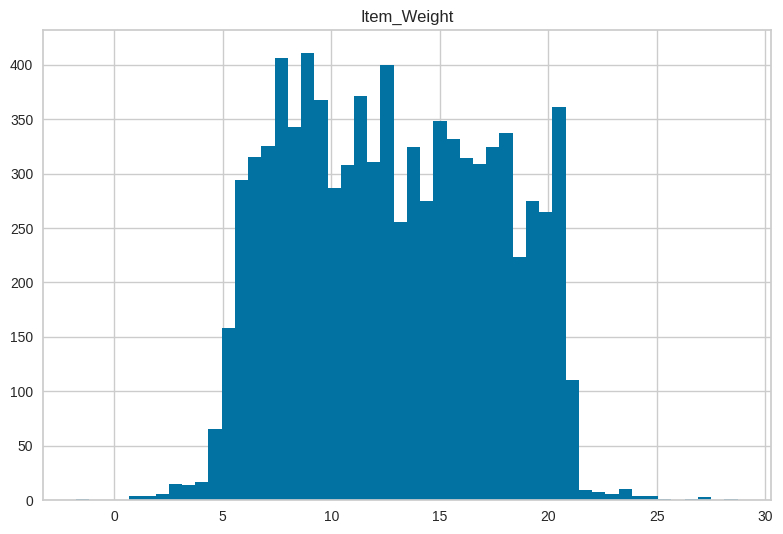

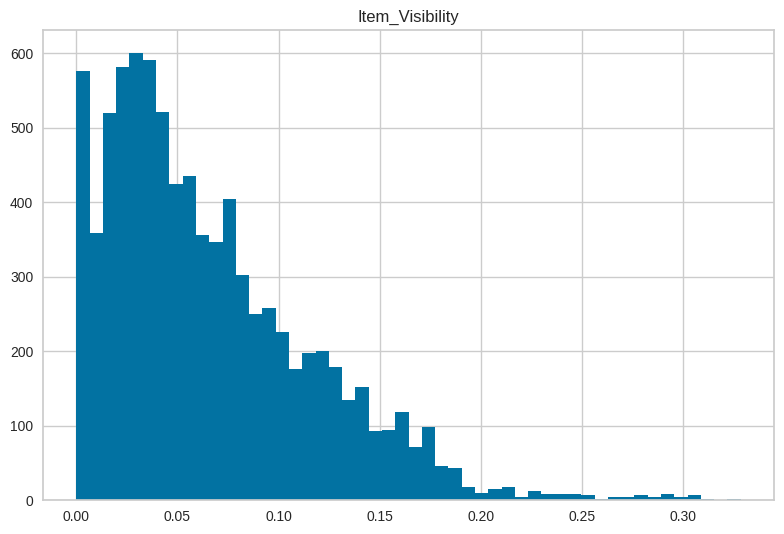

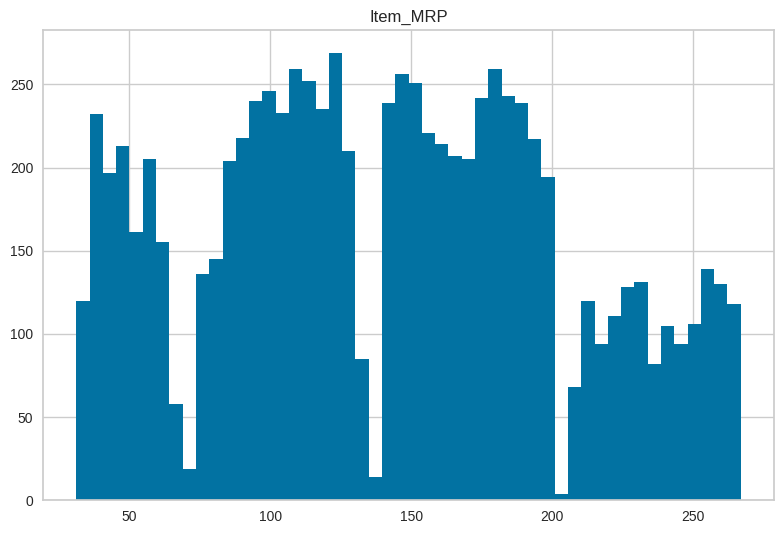

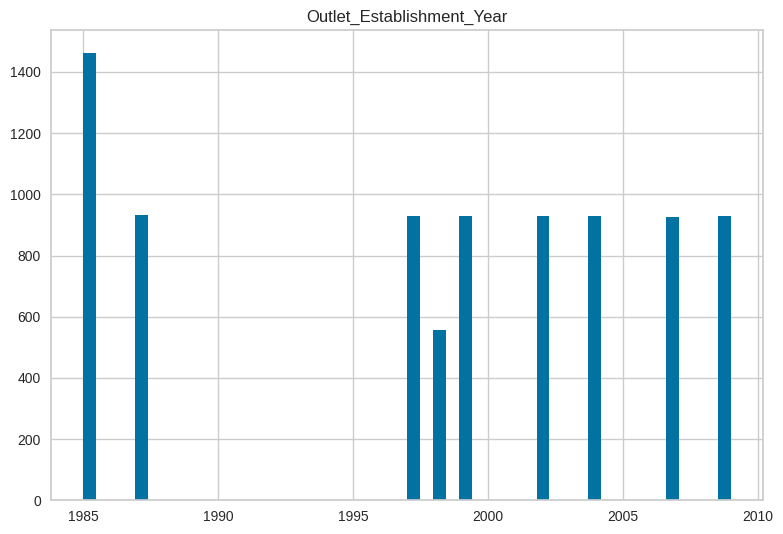

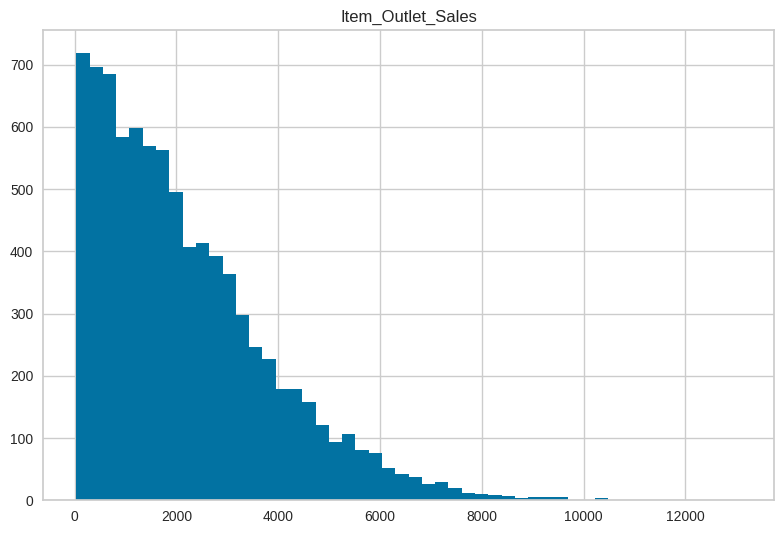

In [255]:
for col in num_columns:
  df[col].hist(bins=50, )
  plt.title(col)
  plt.tight_layout()
  plt.show()


#Correlation / Heatmap

In [256]:
df.shape

(8523, 10)

In [257]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Establishment_Year  8523 non-null   int64  
 6   Outlet_Size                8523 non-null   object 
 7   Outlet_Location_Type       8523 non-null   object 
 8   Outlet_Type                8523 non-null   object 
 9   Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 666.0+ KB


In [258]:
#'''df_encoded = pd.get_dummies(df, columns=['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
                                       #  'Outlet_Location_Type', 'Outlet_Type'], dtype=float)'''

#Edit This one

In [259]:
df = pd.get_dummies(df, columns = ['Item_Fat_Content','Outlet_Size','Outlet_Location_Type','Outlet_Type'], dtype=float)

In [260]:
le = LabelEncoder()

le.fit(df['Item_Type'].unique())
df['Item_Type'] = le.transform(df['Item_Type'])
print(df['Item_Type'].unique())

[ 4 14 10  6  9  0 13  5  2  8  7  3  1 15 11 12]


In [261]:
df.sample(5)

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
5459,11.80,0.04,8,177.57,1998,711.07,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
8503,20.50,0.04,6,120.18,2004,3392.92,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1043,2.89,0.12,7,172.84,1985,7152.02,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1156,5.50,0.05,11,100.00,2007,708.41,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
6415,9.31,0.06,5,63.75,1998,126.50,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [262]:
pd.set_option('display.max_columns', None)

##changing the order

In [263]:
#target_variable = 'Item_Outlet_Sales'
#new_order = [col for col in df if col != target_variable] + [target_variable]
#df_encoded = df_encoded[new_order]

In [264]:
corr_matrix = df.corr()
corr_matrix['Item_Outlet_Sales'].sort_values(ascending=False)

Item_Outlet_Sales                1.00
Item_MRP                         0.57
Outlet_Type_Supermarket Type3    0.31
Outlet_Type_Supermarket Type1    0.11
Outlet_Size_Medium               0.08
Outlet_Location_Type_Tier 2      0.06
Outlet_Location_Type_Tier 3      0.05
Outlet_Size_High                 0.02
Item_Fat_Content_Regular         0.02
Item_Type                        0.02
Item_Weight                      0.01
Item_Fat_Content_Low Fat        -0.02
Outlet_Type_Supermarket Type2   -0.04
Outlet_Establishment_Year       -0.05
Outlet_Size_Small               -0.10
Outlet_Location_Type_Tier 1     -0.11
Item_Visibility                 -0.13
Outlet_Type_Grocery Store       -0.41
Name: Item_Outlet_Sales, dtype: float64

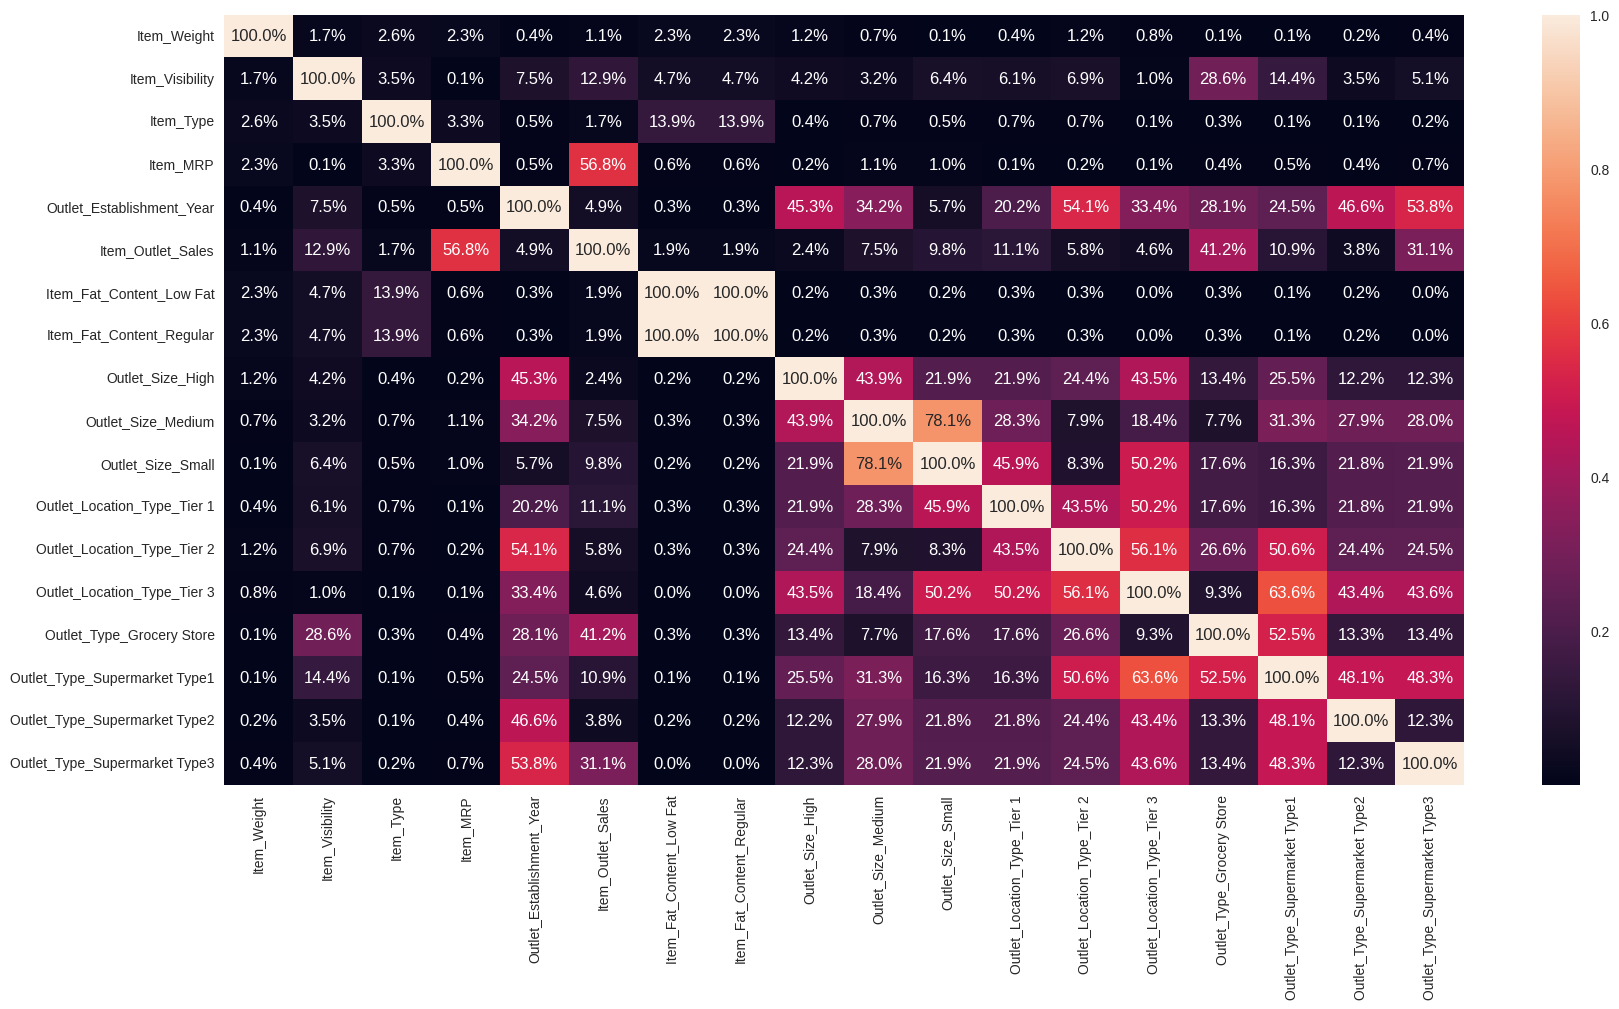

In [265]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr().abs(), annot=True, fmt= '.1%');

In [266]:
print('The highest correlation between feautures:\n')

for x in range(len(df.columns)):
  corr_matrix.iloc[x,x] = 0.0
corr_matrix.abs().idxmax()

The highest correlation between feautures:



Item_Weight                                          Item_Type
Item_Visibility                      Outlet_Type_Grocery Store
Item_Type                             Item_Fat_Content_Low Fat
Item_MRP                                     Item_Outlet_Sales
Outlet_Establishment_Year          Outlet_Location_Type_Tier 2
Item_Outlet_Sales                                     Item_MRP
Item_Fat_Content_Low Fat              Item_Fat_Content_Regular
Item_Fat_Content_Regular              Item_Fat_Content_Low Fat
Outlet_Size_High                     Outlet_Establishment_Year
Outlet_Size_Medium                           Outlet_Size_Small
Outlet_Size_Small                           Outlet_Size_Medium
Outlet_Location_Type_Tier 1        Outlet_Location_Type_Tier 3
Outlet_Location_Type_Tier 2        Outlet_Location_Type_Tier 3
Outlet_Location_Type_Tier 3      Outlet_Type_Supermarket Type1
Outlet_Type_Grocery Store        Outlet_Type_Supermarket Type1
Outlet_Type_Supermarket Type1      Outlet_Location_Type

#Train_Test Split

In [267]:
target_variable = 'Item_Outlet_Sales'
new_order = [col for col in df if col != target_variable] + [target_variable]
df = df[new_order]

In [268]:
df.sample(5)

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Outlet_Sales
3148,18.25,0.17,4,155.66,1999,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2034.02
192,11.85,0.05,6,164.15,2002,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,3124.60
1487,7.42,0.02,13,248.91,1997,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2241.08
7334,15.70,0.16,9,57.86,2002,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,651.82
8094,10.10,0.04,3,118.11,1998,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,116.52


In [269]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [270]:
df.columns.tolist()

['Item_Weight',
 'Item_Visibility',
 'Item_Type',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Fat_Content_Low Fat',
 'Item_Fat_Content_Regular',
 'Outlet_Size_High',
 'Outlet_Size_Medium',
 'Outlet_Size_Small',
 'Outlet_Location_Type_Tier 1',
 'Outlet_Location_Type_Tier 2',
 'Outlet_Location_Type_Tier 3',
 'Outlet_Type_Grocery Store',
 'Outlet_Type_Supermarket Type1',
 'Outlet_Type_Supermarket Type2',
 'Outlet_Type_Supermarket Type3',
 'Item_Outlet_Sales']

In [271]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((6818, 17), (6818,), (1705, 17), (1705,))

In [272]:
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [273]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

#Train the Model

#SGDRegressor

In [274]:
sgdreg = SGDRegressor()
sgdreg.fit(X_train_poly, y_train)

SGDRegressor()

In [275]:
y_pred = sgdreg.predict(X_test_poly)

In [276]:
r2_SGD = r2_score(y_test, y_pred)
print(r2_SGD)

0.6135894342269471


#LinearRegression

In [277]:
regressor = LinearRegression()
regressor.fit(X_train_poly, y_train)

LinearRegression()

In [278]:
y_hat = regressor.predict(X_test_poly)

In [279]:
r2_linear = r2_score(y_test, y_hat)
print(r2_linear)

0.619726173275976


In [280]:
lridge = Ridge()
lridge.fit(X_train_poly, y_train)

Ridge()

In [281]:
y_hat_ridge = lridge.predict(X_test_poly)
r2_ridge = r2_score(y_test, y_hat_ridge)
print(r2_ridge)

0.6190969035176295


#Featur Importance

In [282]:
from sklearn.ensemble import RandomForestRegressor

Item_MRP                         5.09e-01
Outlet_Type_Grocery Store        2.61e-01
Outlet_Type_Supermarket Type3    8.14e-02
Item_Visibility                  4.57e-02
Item_Weight                      4.05e-02
Outlet_Establishment_Year        2.82e-02
Item_Type                        1.97e-02
Item_Fat_Content_Low Fat         2.03e-03
Item_Fat_Content_Regular         1.91e-03
Outlet_Location_Type_Tier 3      1.66e-03
Outlet_Type_Supermarket Type2    1.60e-03
Outlet_Size_Small                1.59e-03
Outlet_Type_Supermarket Type1    1.55e-03
Outlet_Location_Type_Tier 2      1.32e-03
Outlet_Location_Type_Tier 1      1.21e-03
Outlet_Size_Medium               1.01e-03
Outlet_Size_High                 6.10e-04
dtype: float64


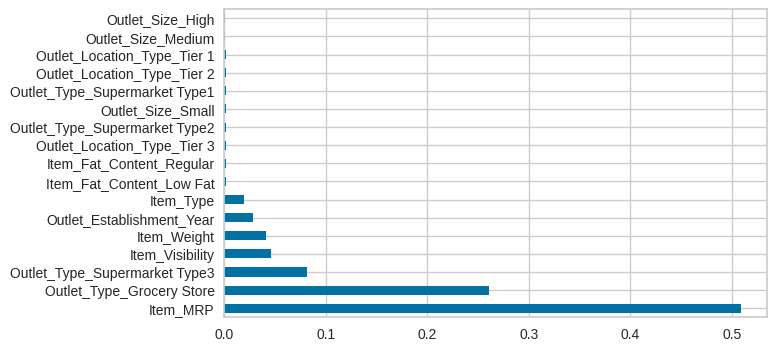

In [283]:
column_names = ['Item_Weight',
 'Item_Visibility',
 'Item_Type',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Fat_Content_Low Fat',
 'Item_Fat_Content_Regular',
 'Outlet_Size_High',
 'Outlet_Size_Medium',
 'Outlet_Size_Small',
 'Outlet_Location_Type_Tier 1',
 'Outlet_Location_Type_Tier 2',
 'Outlet_Location_Type_Tier 3',
 'Outlet_Type_Grocery Store',
 'Outlet_Type_Supermarket Type1',
 'Outlet_Type_Supermarket Type2',
 'Outlet_Type_Supermarket Type3']
X_train_df = pd.DataFrame(X_train, columns=column_names)

rf = RandomForestRegressor(max_depth=10)
rf.fit(X_train_df, y_train)

plt.figure(figsize=(7,4))
feature_importance = pd.Series(rf.feature_importances_, index=X_train_df.columns)
feature_importance.nlargest(len(X_train_df.columns)).plot(kind='barh')
print(feature_importance.sort_values(ascending=False))

#Final Result

In [284]:
result = pd.DataFrame({'Model': ['SGDRegressor', 'LinearRegressor', 'Ridge'],
                       'r2_score' : [r2_SGD, r2_linear, r2_ridge]}
)

result

,Model,r2_score
0,SGDRegressor,0.61
1,LinearRegressor,0.62
2,Ridge,0.62
